In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"C:\Users\user\Downloads\archive (11)\data.csv",sep=",")

data = df
print(df.info())
print(df.describe())
df.head()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 33)

In [49]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [64]:
data_cleaned = data.drop(columns='Unnamed: 32')

In [65]:
# Шаг 2: Обрабатываем пропущенные значения
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Stress Ratio,Smoothness Category
0,842302,M,17,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1.493849,Normal
1,842517,M,20,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1.065530,Low
2,84300903,M,19,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,0.853933,Normal
3,84348301,M,11,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,0.514500,Normal
4,84358402,M,20,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1.303781,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,0.897820,Normal
565,926682,M,20,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,0.683761,Low
566,926954,M,16,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,0.550206,Low
567,927241,M,20,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,0.659413,Normal


In [66]:
data['radius_mean'] = data['radius_mean'].astype(int)

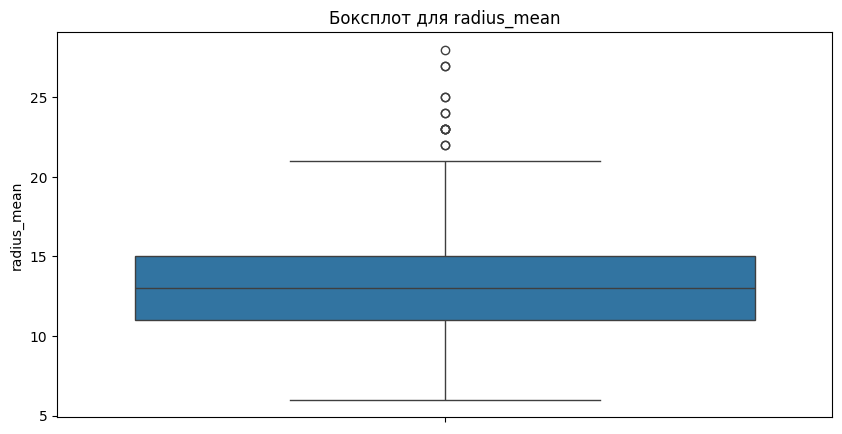

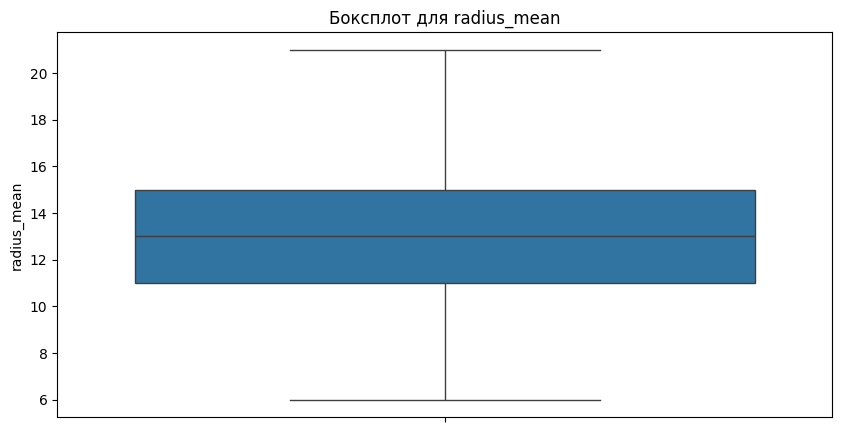

In [67]:
# Функция для удаления выбросов
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Удаление выбросов
outlier_columns = ['radius_mean']
data_without_outliers = remove_outliers(data, outlier_columns)

plt.figure(figsize=(10, 5))
sns.boxplot(data=data, y= 'radius_mean')
plt.title('Боксплот для radius_mean')
plt.ylabel('radius_mean')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data_without_outliers, y= 'radius_mean')
plt.title('Боксплот для radius_mean')
plt.ylabel('radius_mean')
plt.show()

In [53]:
data[numeric_columns]

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,20,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,16,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,20,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [68]:
# Шаг 6: Финальная проверка очищенных данных
cleaned_data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    int32  
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [69]:
# Шаг 6: Описательная статистика для числовых признаков
numeric_stats = data[numeric_columns].describe().T  # Основные статистические показатели

# Дополнительно: рассчитываем моду для числовых признаков
numeric_stats['mode'] = data[numeric_columns].mode().iloc[0]
numeric_stats

,count,mean,std,min,25%,50%,75%,max,mode
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08,8670.000000
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01,14.930000
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02,82.610000
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03,512.200000
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01,0.100700
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01,0.114700
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01,0.000000
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01,0.000000
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01,0.160100
fractal_dimension_mean,569.0,6.279761e-02,7.060363e-03,0.049960,0.057700,0.061540,6.612000e-02,9.744000e-02,0.056670


In [70]:
# Шаг 7: Группировка данных по категории и анализ среднего значения депрессии
grouped_data = data.groupby('diagnosis')['texture_mean'].mean()
grouped_data

diagnosis
B    17.914762
M    21.604906
Name: texture_mean, dtype: float64

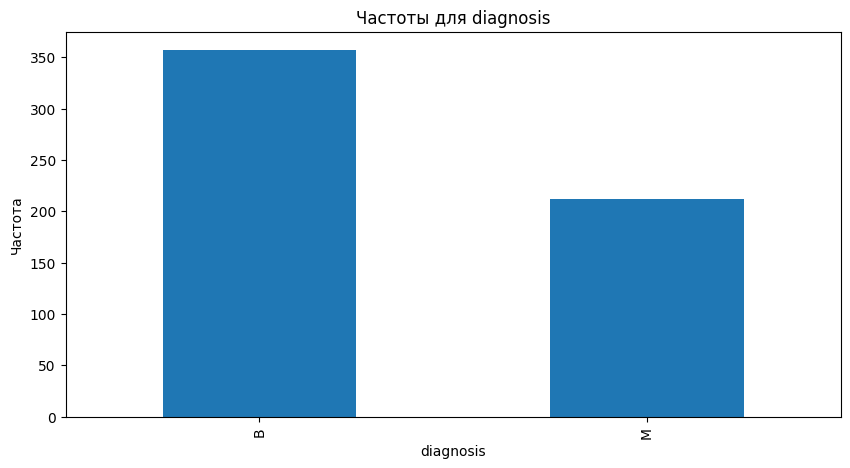

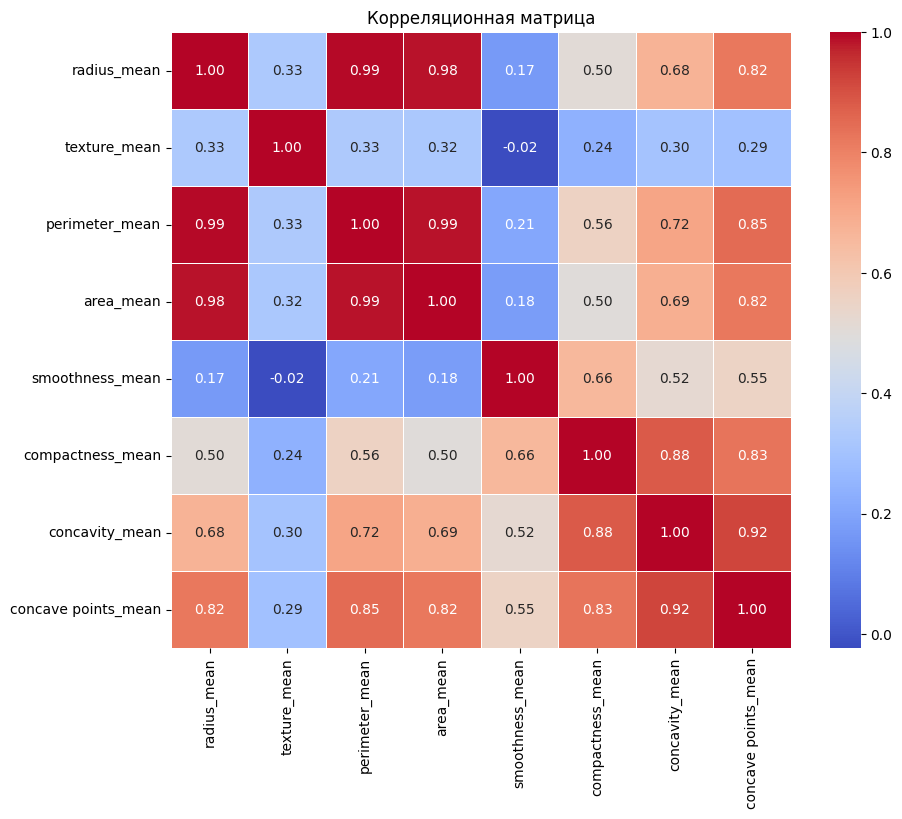

In [71]:
# Столбчатая диаграмма для категориальных данных
import matplotlib.pyplot as plt
import seaborn as sns

# Категориялық және сандық бағандарды анықтау
categorical_columns = ['diagnosis']  # Категориялық бағандар
numeric_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                   'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']

# Категориялық бағандар бойынша бар графиктер
for col in categorical_columns:
    data[col].value_counts().plot(kind='bar', title=f'Частоты для {col}', figsize=(10, 5))
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

# Корреляциялық матрица және тепловая карта
corr_matrix = data[numeric_columns].corr()  # Сандық бағандар бойынша корреляция
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()


In [72]:
# Шаг 8: Создание новых признаков с использованием ваших данных

# Тексереміз, бар ма  (мысалы, 'radius_mean' және 'texture_mean')
if 'radius_mean' in data.columns and 'texture_mean' in data.columns:
    # Жаңа бағанды қосу: Соотношение 'radius_mean' к 'texture_mean'
    data['Stress Ratio'] = data['radius_mean'] / (data['texture_mean'] + 1)

# 'Sleep Duration' бағанының орнына 'smoothness_mean'-ді қолдану
if 'smoothness_mean' in data.columns:
    # Категорияларды анықтау
    def classify_smoothness(x):
        if x < 0.1:
            return 'Low'
        elif 0.1 <= x <= 0.15:
            return 'Normal'
        else:
            return 'High'

    # Жаңа бағанды қосу
    data['Smoothness Category'] = data['smoothness_mean'].apply(classify_smoothness)

# Жаңа бағандарды қарау
data[['Stress Ratio', 'Smoothness Category']].head()


,Stress Ratio,Smoothness Category
0,1.493849,Normal
1,1.065530,Low
2,0.853933,Normal
3,0.514500,Normal
4,1.303781,Normal


In [60]:
# Шаг 9: Фильтрация и сортировка данных

# Фильтруем данные: отбираем записи с высоким уровнем 'radius_mean'
high_radius_mean_data = data[data['radius_mean'] > 15].sort_values(by='texture_mean', ascending=False)

# Отображаем первые строки отфильтрованных данных
print(high_radius_mean_data.head())


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
239  88330202         M           17         39.28           113.4      920.6   
219  88119002         M           19         32.47           128.0     1223.0   
265  88995002         M           20         31.12           135.7     1419.0   
567    927241         M           20         29.33           140.1     1265.0   
256  88649001         M           19         28.77           133.6     1207.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
239          0.09812            0.1298          0.1417              0.08811   
219          0.08420            0.1130          0.1145              0.06637   
265          0.09469            0.1143          0.1367              0.08646   
567          0.11780            0.2770          0.3514              0.15200   
256          0.09260            0.2063          0.1784              0.11440   

     ...  area_worst  smoothness_worst

In [62]:
# Шаг 10: Создание сводной таблицы

# Создаем сводную таблицу
pivot_table = data.pivot_table(
    values='radius_mean', 
    index='diagnosis', 
    columns='Smoothness Category', 
    aggfunc='mean'
)

# Отображаем результат
pivot_table


Smoothness Category,High,Low,Normal
diagnosis,,,
B,9.0,11.869732,11.021053
M,NaN,17.186813,16.876033


In [63]:
# Шаг 11: Вывод результатов фильтрации, новых признаков и сводной таблицы

# Отбираем нужные столбцы из фильтрованных данных
filtered_results = high_radius_mean_data[[
    'id', 'radius_mean', 'texture_mean', 'Stress Ratio', 'Smoothness Category'
]]

# Отображаем результаты
filtered_results.head()


,id,radius_mean,texture_mean,Stress Ratio,Smoothness Category
239,88330202,17,39.28,0.422046,Low
219,88119002,19,32.47,0.567673,Low
265,88995002,20,31.12,0.622665,Low
567,927241,20,29.33,0.659413,Normal
256,88649001,19,28.77,0.638226,Low
